#1

Импортируем библиотеки для анализа данных numpy, pandas) и для построения графиков

In [225]:
import pandas as pd
import numpy as np

from sklearn import preprocessing # обучение
import matplotlib.pyplot as plt  # графики
import seaborn as sns

In [226]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heart.csv')
# загружаем датасет

Краткое описание признаков:

Age : возраст пациента

Sex : пол пациента

exang: стенокардия из-за физической наргузки (1 = да; 0 = нет)

ca: количество крупных сосудов (0-3)

cp : тип грудной боли

Value 1: типичная стенокардия
Value 2: нетипичная стенокардия
Value 3: боль без стенокардии
Value 4: бессимптомная боль

trtbps : артериальное давление в покое (in mm Hg)

chol : холестерин в мг

fbs : (уровень сахара в крови натощак > 120 мг/дл(децилитр)) (1 = true; 0 = false)

rest_ecg : электрокардиография в покое

Value 0: нормальное значение
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [227]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [230]:
df.shape

(303, 14)

# Визуализация данных

поделим датасет на категориальные и некатегориальные величины

In [231]:
cat_cols = df[['sex','exng','caa','cp','fbs','restecg','slp','thall', 'output']]
con_cols = df[['age','trtbps','chol', 'thalachh', 'oldpeak', 'output']]

Построим корреляционную матрицу для того, чтобы выявить ненужные признаки

In [232]:
import plotly.express as px
px.imshow(df.corr())

<Axes: >

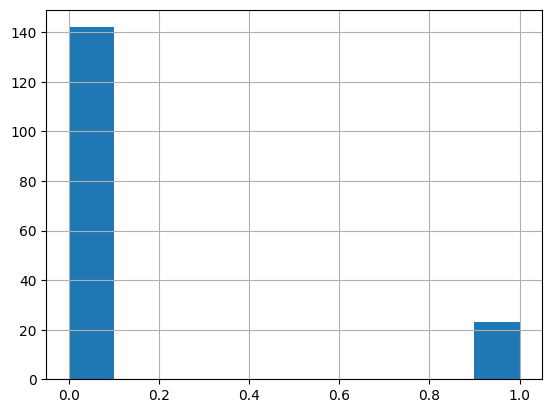

In [233]:

df[df['output'] == 1]['fbs'].hist()


<Axes: >

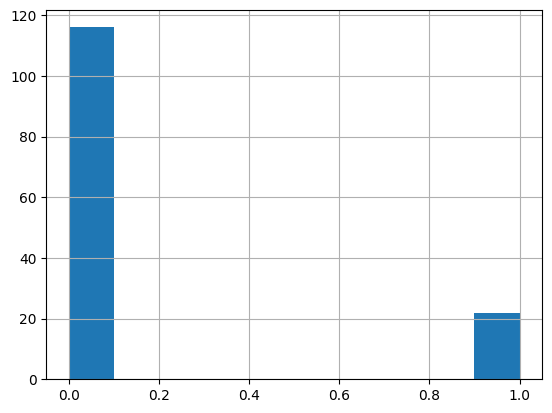

In [234]:
df[df['output'] == 0]['fbs'].hist()

In [235]:
df.groupby('output')['fbs'].value_counts()

output  fbs
0       0      116
        1       22
1       0      142
        1       23
Name: fbs, dtype: int64

<h3>Удалим признак fbs</h3>

In [236]:
del df['fbs']

# Продолжение визуализации

In [237]:
df.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [238]:
px.histogram(df[df['output'] == 1], x='age').show()
px.histogram(df[df['output'] == 0], x='age').show()

In [239]:
df[df['output'] == 1]['age'].describe()


count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

In [240]:
df[df['output'] == 0]['age'].describe()

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [241]:
px.histogram(df, x='sex').show()

<Axes: >

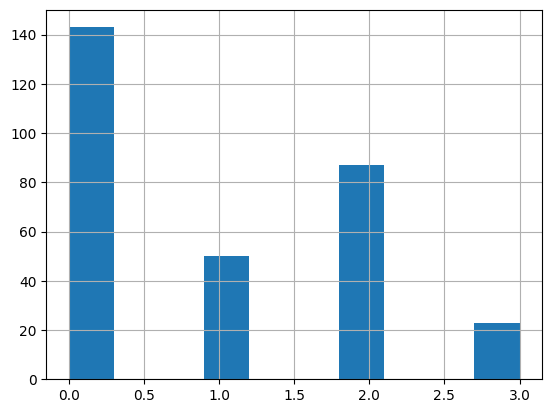

In [242]:
df['cp'].hist()

In [243]:
df.groupby('cp')['sex'].value_counts()

cp  sex
0   1      104
    0       39
1   1       32
    0       18
2   1       52
    0       35
3   1       19
    0        4
Name: sex, dtype: int64

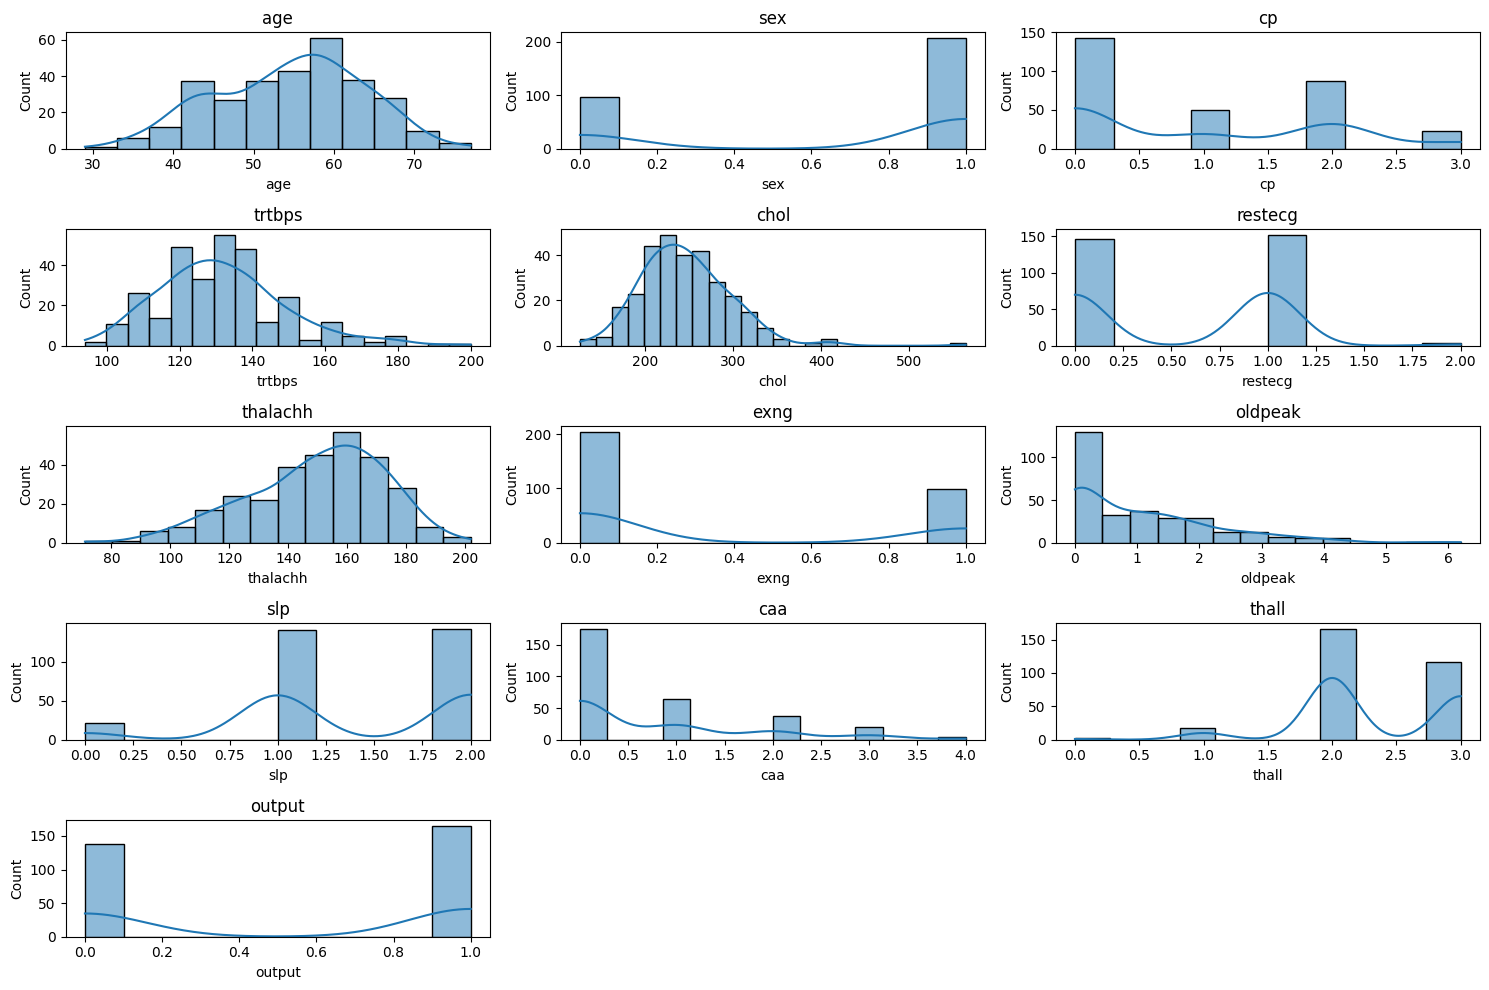

In [244]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i) # размер таблицы изображений
    plt.title(col) # название график
    sns.histplot(df[col],kde=True) #
    plt.tight_layout() # чтобы графики с названиями не наехали друг на друга


In [245]:
catcols = ['sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
concols = list(set(df.columns) - set(catcols))
concols.append('output')
print(concols)

['trtbps', 'age', 'chol', 'oldpeak', 'thalachh', 'output']


In [246]:
px.imshow(df[catcols].corr())

In [247]:
px.imshow(df[concols].corr())

<Axes: >

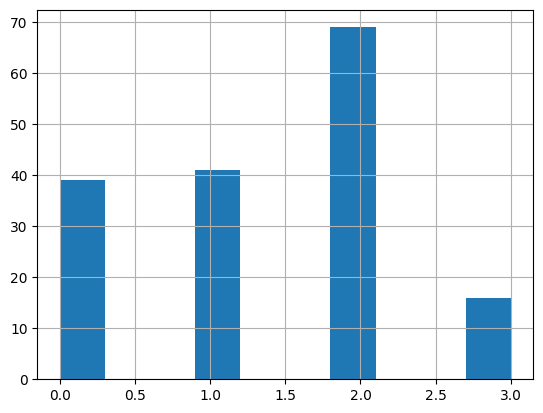

In [248]:
df[df['output'] == 1]['cp'].hist()


<Axes: >

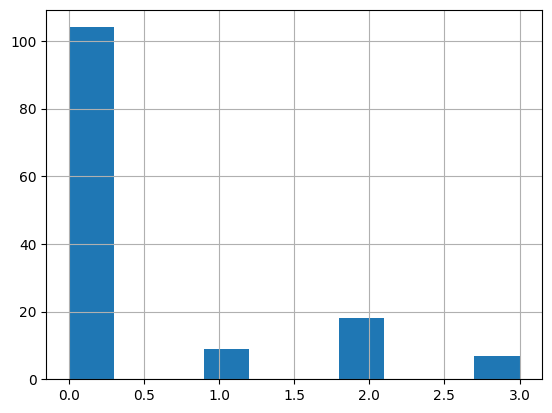

In [249]:
df[df['output'] == 0]['cp'].hist()

In [250]:
df['cp2'] = np.where(df['cp'] == 2, 1, 0)

In [251]:
df['cp2'].corr(df['output'])

0.3167421581955395

[Text(0.5, 0, 'age')]

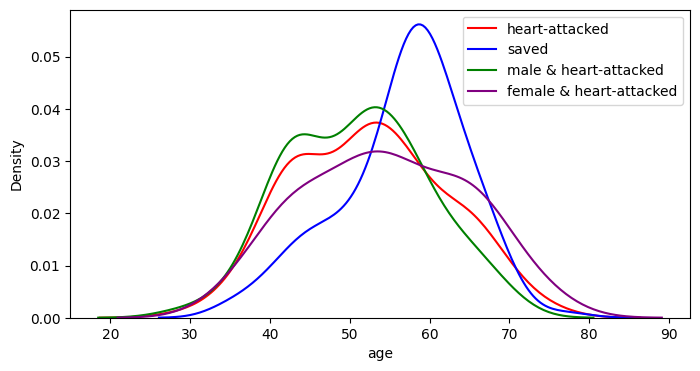

In [252]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['age'][df.output == 1], color='red')
sns.kdeplot(df['age'][df.output == 0], color='blue')
ax = sns.kdeplot(df[df['sex'] == 1]['age'][df.output == 1], color='green')
ax = sns.kdeplot(df[df['sex'] == 0]['age'][df.output == 1], color='purple')
plt.legend(['heart-attacked', 'saved', 'male & heart-attacked', 'female & heart-attacked'])
ax.set(xlabel='age')

[Text(0.5, 0, 'age')]

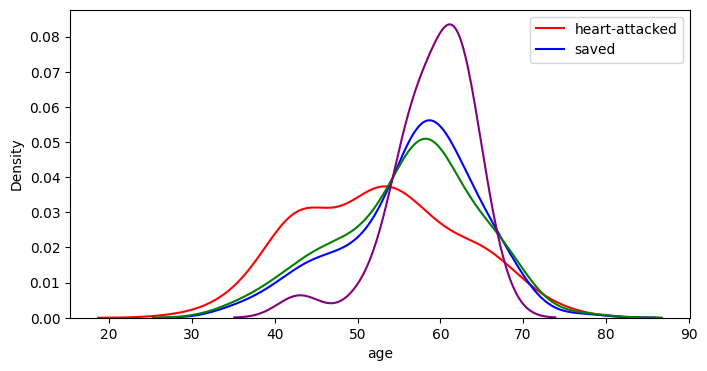

In [253]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['age'][df.output == 1], color='red')
sns.kdeplot(df['age'][df.output == 0], color='blue')
ax = sns.kdeplot(df[df['sex'] == 1]['age'][df.output == 0], color='green')
ax = sns.kdeplot(df[df['sex'] == 0]['age'][df.output == 0], color='purple')
plt.legend(['heart-attacked', 'saved'])
ax.set(xlabel='age')

зависимости между полом, возрастом и приступом почти нет, но видно, что в возрасте 60 лет люди реже испытывают приступ

Зависимость сердечного приступа от типа грудной боли у мужчин и у женщин

[Text(0.5, 0, 'chest pain')]

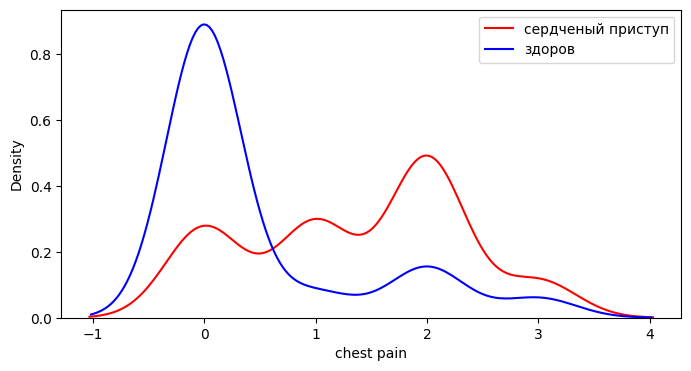

In [254]:
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['cp'][df.output == 1], color='red')
sns.kdeplot(df['cp'][df.output == 0], color='blue')

plt.legend(['сердченый приступ', 'здоров'])
ax.set(xlabel='chest pain')

[]

<Figure size 1500x1000 with 0 Axes>

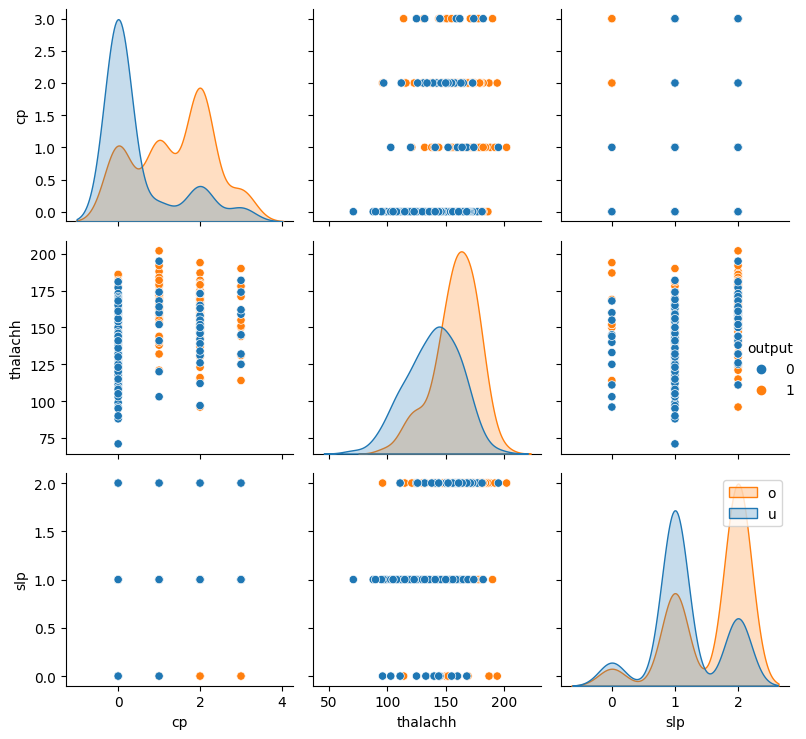

In [255]:
"""cr = ['slp', 'cp', 'thalachh', 'output']
px.imshow(df[cr].corr())
"""
c = ['cp', 'thalachh', 'slp', 'output']
plt.figure(figsize=(15, 10))
sns.pairplot(df[c], hue='output')
plt.legend("output")
plt.tight_layout()
plt.plot()

Самые сильные корреляты для output - cp, slp, thalachh.

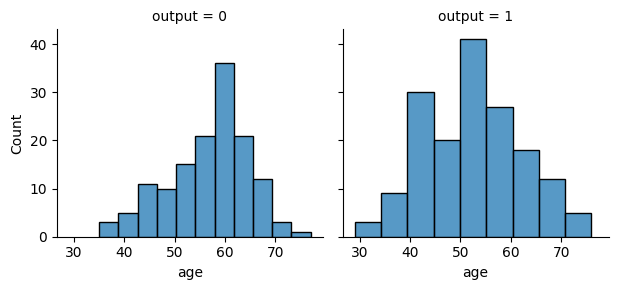

In [256]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'age')


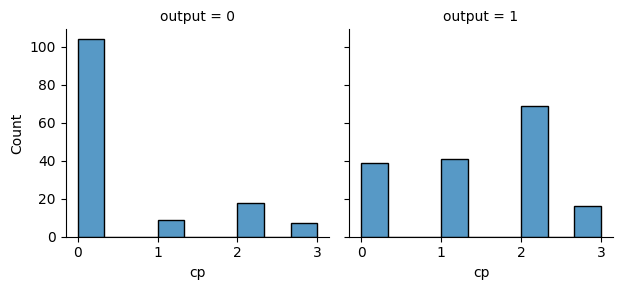

In [257]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'cp')

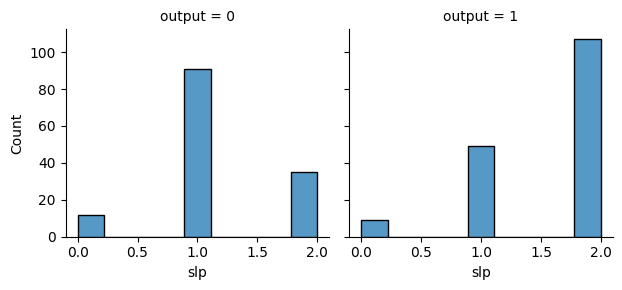

In [258]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'slp')

In [259]:
df[(df['slp'] == 2) & (df['cp'] == 2)]['output'].mean()

0.9183673469387755

In [260]:
pd.crosstab(df[df['cp']==2]['slp'], df['output'])

output,0,1
slp,,
0,0,5
1,14,19
2,4,45


In [261]:
df['slp&&cp=2'] = np.where((df['slp'] == 2) & (df['cp'] == 2), 1, 0)

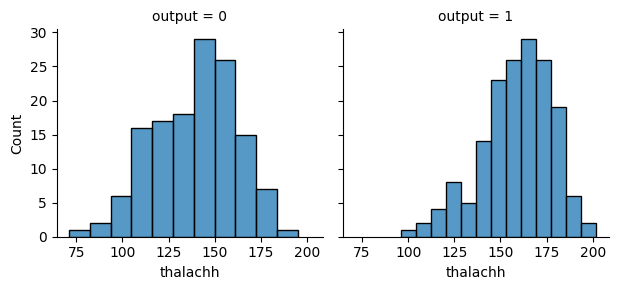

In [262]:
g = sns.FacetGrid(data=df, col='output', col_wrap= 4 ).map (sns.histplot , 'thalachh')

#Секция 3

<h3>Данные с output = 0 располагаются в конце, для грамотно составленной тестовой и тренировочной выборок нужно их перемешать.</h3>

In [263]:
from sklearn.utils import shuffle
df = shuffle(df)

In [264]:
train_df = df[:int(0.8 * df.shape[0])] # тренировочная выборка
test_df = df[(train_df.shape[0]):] # тестовая выборка - 20 % от основной
print(train_df.shape, test_df.shape, df.shape)

(242, 15) (61, 15) (303, 15)


In [265]:
train_df['output'].value_counts()

1    125
0    117
Name: output, dtype: int64

#Отбор признаков двумя методами

In [ ]:
!pip install sklearn

In [ ]:
label = train_df['output']
train_df.drop('output', axis=1, inplace=True)

 ### Отбор признаков методом случайного леса (1)

<Figure size 200x500 with 0 Axes>

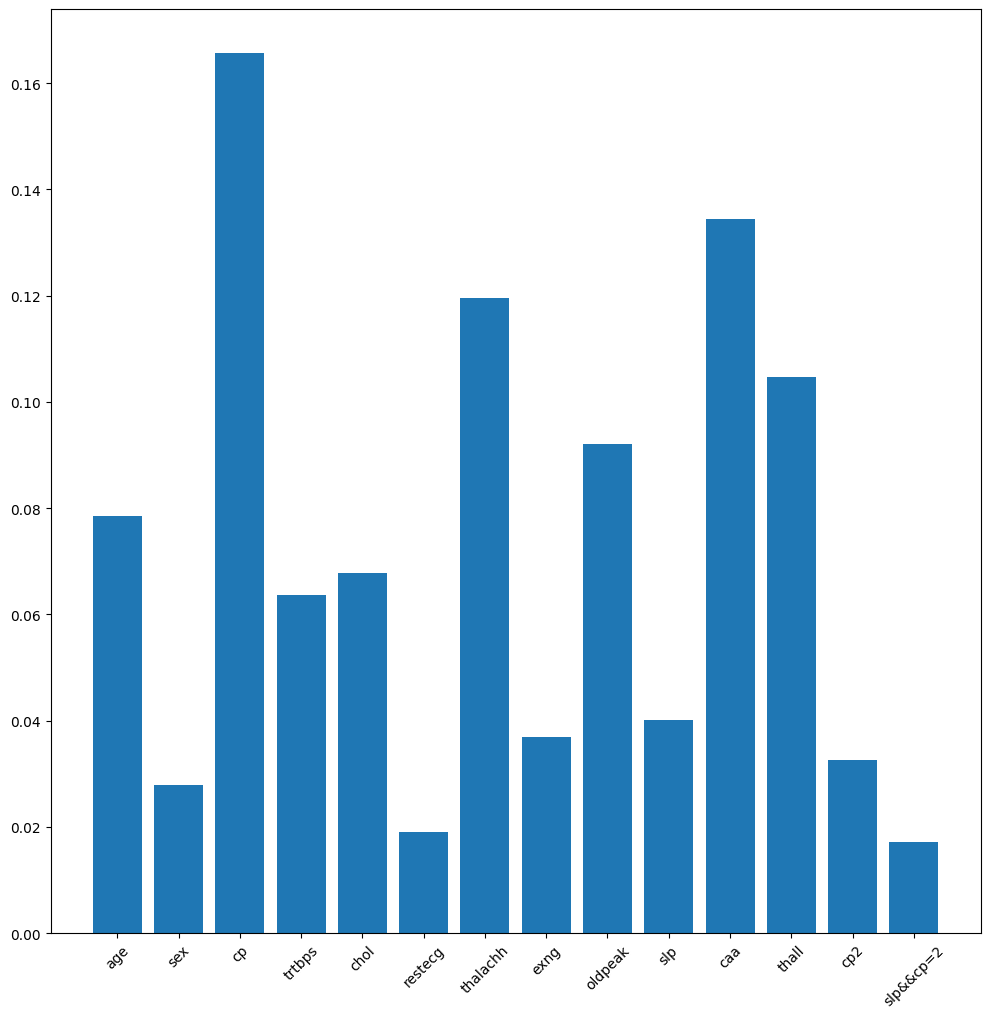

In [268]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(2, 5))
clf = RandomForestClassifier()
clf.fit(train_df, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(train_df.columns, clf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [278]:
randomforest_features = ['age', 'thalachh', 'caa', 'thall', 'trtbps', 'oldpeak']
X1 = train_df[randomforest_features]
Y1 = label

## Отбор признаков рекурсивными алгоритмами RFE (2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = train_df
y = label
model = LogisticRegression()
rfe = RFE(model)
rfe = rfe.fit(X, y)
print(list(X.columns[rfe.support_]))

In [280]:
rfe_features = ['sex', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X2= train_df[rfe_features]
Y2 = label

Две модели показали разную значимость признаков, они сохранены в X1 и X



# Секция 4

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, # убираем output, axis = 1 - колонка
    label,
    test_size= 0.2,  # тестовая выборка - 20 %
    random_state=0, # воспроизведение через вывод нескольких функций
    shuffle = True, # перемешивание значений
    stratify = label # основной вывод
)



In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, Y_pred)
print('Точность ',round(acc,2)*100,'%')

Точность  90.0 %


In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, # убираем output, axis = 1 - колонка
    label,
    test_size= 0.2,  # тестовая выборка - 20 %
    random_state=0, # воспроизведение через вывод нескольких функций
    shuffle = True, # перемешивание значений
    stratify = label # основной вывод
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, Y_pred)
print('Точность ',round(acc,2)*100,'%')

Точность  88.0 %


#4
